# Processing Dataset

In [1]:
# Download dataset
!wget https://github.com/pragatiunna/License-Plate-Number-Detection/raw/main/data.zip

--2022-05-21 14:17:30--  https://github.com/pragatiunna/License-Plate-Number-Detection/raw/main/data.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pragatiunna/License-Plate-Number-Detection/main/data.zip [following]
--2022-05-21 14:17:30--  https://raw.githubusercontent.com/pragatiunna/License-Plate-Number-Detection/main/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1444032 (1.4M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   1.38M  --.-KB/s    in 0.02s   

2022-05-21 14:17:30 (76.5 MB/s) - ‘data.zip’ saved [1444032/1444032]



In [2]:
import zipfile

# Extract the archive
local_zip = './data.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/data')
zip_ref.close()

In [3]:
import os

base_dir = 'tmp/data/data/train'

class_0_dir = os.path.join(base_dir, 'class_0')
class_1_dir = os.path.join(base_dir, 'class_1')
class_Z_dir = os.path.join(base_dir, 'class_Z')

print('total training 0 images:', len(os.listdir(class_0_dir)))
print('total training 1 images:', len(os.listdir(class_1_dir)))
print('total training Z images:', len(os.listdir(class_Z_dir)))

class_0_files = os.listdir(class_0_dir)
print(class_0_files[:10])

class_1_files = os.listdir(class_1_dir)
print(class_1_files[:10])

class_Z_files = os.listdir(class_Z_dir)
print(class_Z_files[:10])

total training 0 images: 24
total training 1 images: 24
total training Z images: 24
['class_0_13.jpg', 'class_0_10.jpg', 'class_0_7.jpg', 'class_0_15.jpg', 'class_0_6.jpg', 'class_0_5.jpg', 'class_0_14.jpg', 'class_0_8.jpg', 'class_0_23.jpg', 'class_0_24.jpg']
['class_1_2.jpg', 'class_1_22.jpg', 'class_1_6.jpg', 'class_1_18.jpg', 'class_1_4.jpg', 'class_1_7.jpg', 'class_1_23.jpg', 'class_1_8.jpg', 'class_1_13.jpg', 'class_1_26.jpg']
['class_Z_23.jpg', 'class_Z_22.jpg', 'class_Z_13.jpg', 'class_Z_11.jpg', 'class_Z_29.jpg', 'class_Z_10.jpg', 'class_Z_25.jpg', 'class_Z_20.jpg', 'class_Z_8.jpg', 'class_Z_24.jpg']


# Model

In [14]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(36, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 5408)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                346176    
                                                                 
 dense_11 (Dense)            (None, 36)                2340      
                                                                 
Total params: 349,412
Trainable params: 349,412
Non-trainable params: 0
________________________________________________

In [15]:
# Set the training parameters
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Image Preprocessing

In [16]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/data/data/train"
training_datagen = ImageDataGenerator(rescale=1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "tmp/data/data/val"
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(28,28),
	class_mode='sparse',
  batch_size=62
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(28,28),
	class_mode='sparse',
  batch_size=62
)

Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


# Training Model

In [19]:
# Train the model
history = model.fit(train_generator, epochs=172, steps_per_epoch=5, validation_data = validation_generator, verbose = 1, validation_steps=2)

Epoch 1/172
5/5 [==============================] - 1s 126ms/step - loss: 1.7440 - accuracy: 0.4548 - val_loss: 1.0515 - val_accuracy: 0.6290
Epoch 2/172
5/5 [==============================] - 1s 114ms/step - loss: 1.8005 - accuracy: 0.4419 - val_loss: 1.1318 - val_accuracy: 0.6290
Epoch 3/172
5/5 [==============================] - 1s 125ms/step - loss: 1.7876 - accuracy: 0.4412 - val_loss: 0.9354 - val_accuracy: 0.6452
Epoch 4/172
5/5 [==============================] - 1s 111ms/step - loss: 1.7057 - accuracy: 0.4355 - val_loss: 0.9656 - val_accuracy: 0.6452
Epoch 5/172
5/5 [==============================] - 1s 103ms/step - loss: 1.7261 - accuracy: 0.4739 - val_loss: 0.9657 - val_accuracy: 0.6613
Epoch 6/172
5/5 [==============================] - 1s 116ms/step - loss: 1.6090 - accuracy: 0.4871 - val_loss: 0.8646 - val_accuracy: 0.6855
Epoch 7/172
5/5 [==============================] - 1s 113ms/step - loss: 1.7195 - accuracy: 0.4608 - val_loss: 0.9396 - val_accuracy: 0.6371
Epoch 8/172
5

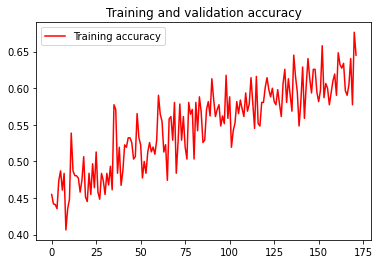

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [24]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(28, 28))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  result = int(np.argmax(classes))
  dictionary = {0:'0', 1:'1', 2 :'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A',
    11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J', 20:'K',
    21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
    30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z'}
  print(dictionary[result])

Saving test4.jpg to test4 (1).jpg
test4.jpg
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
5
